In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt


In [17]:
# Load dataset
dataset = "heart.csv"
data = pd.read_csv(dataset)

#### Memisahkan fitur dan target

In [18]:
X = data.drop(columns=["target"]) 
y = data["target"] 

In [19]:
# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluasi model

In [21]:

accuracy = model.score(X_test, y_test)
print(f"Akurasi model: {accuracy:.2f}")

Akurasi model: 0.75


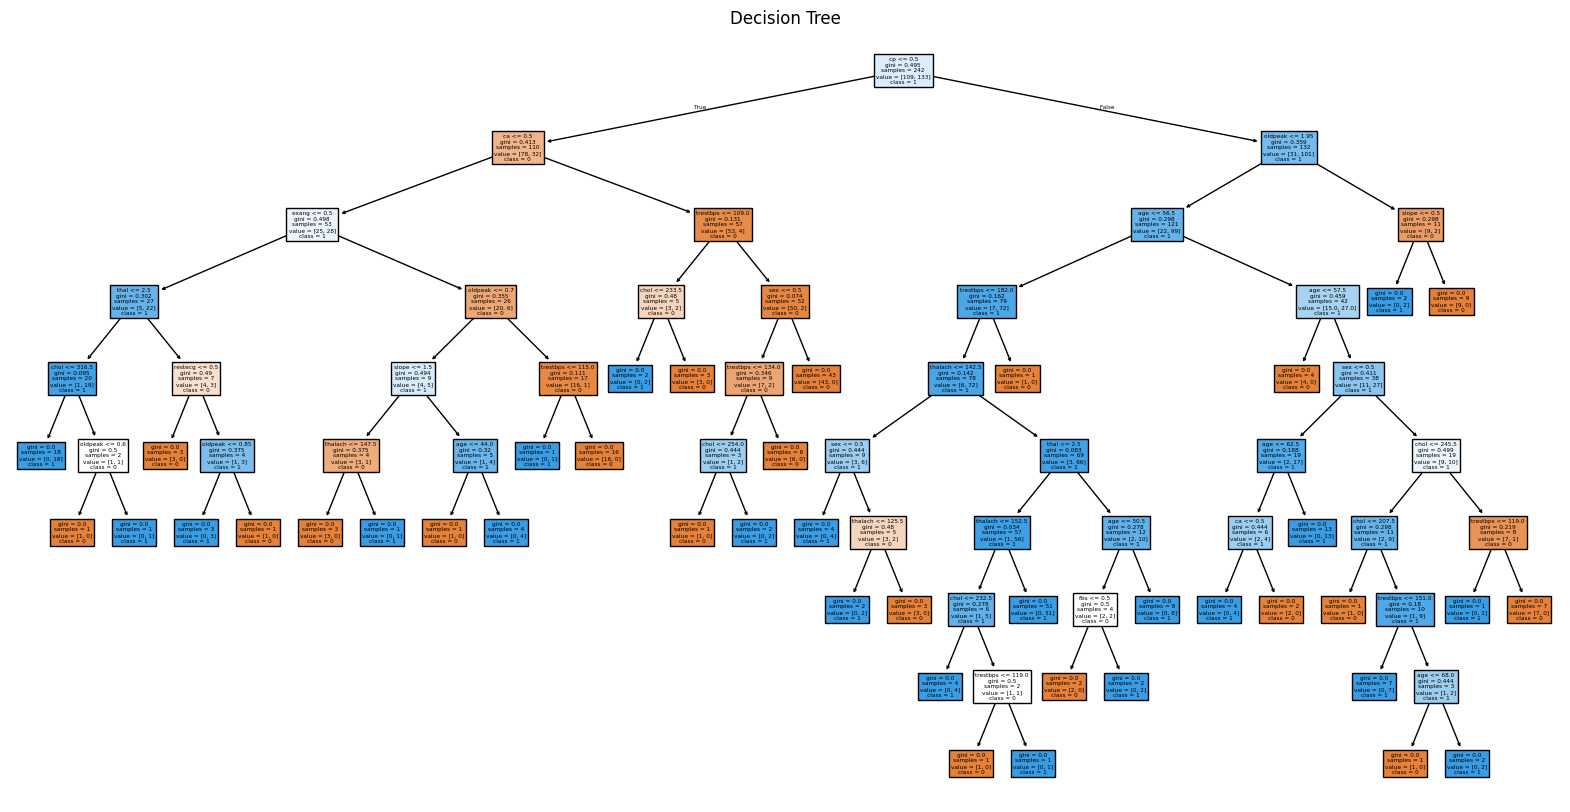

In [22]:
# Show Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["0", "1"], filled=True)
plt.title("Decision Tree")
plt.show()


In [23]:
# Show aturan  Decision Tree
rules = export_text(model, feature_names=list(X.columns))
print("\nAturan Decision Tree:\n")
print(rules)


Aturan Decision Tree:

|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- exang <= 0.50
|   |   |   |--- thal <= 2.50
|   |   |   |   |--- chol <= 316.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- chol >  316.50
|   |   |   |   |   |--- oldpeak <= 0.60
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- oldpeak >  0.60
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- thal >  2.50
|   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |--- oldpeak <= 0.85
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- oldpeak >  0.85
|   |   |   |   |   |   |--- class: 0
|   |   |--- exang >  0.50
|   |   |   |--- oldpeak <= 0.70
|   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |--- thalach <= 147.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- thalach >  147.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- slope >  1.50
|   |   |   |   |   |--- age <=

In [25]:
# Uji Model Menggunakan Data Baru
sample_data = pd.DataFrame(
    [[45, 1, 2, 130, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]],
    columns=X.columns
)
# Prediksi
hasil_prediksi = model.predict(sample_data)
print(f"Hasil prediksi untuk data baru: {'Penyakit Jantung' if hasil_prediksi[0] == 1 else 'Tidak Ada Penyakit Jantung'}")


Hasil prediksi untuk data baru: Penyakit Jantung


In [29]:
kesimpulan = """
Kesimpulan:
1. Model Decision Tree berhasil dilatih dengan akurasi {:.2f}%.
2. Berdasarkan aturan yang dihasilkan:
   - Faktor utama yang memengaruhi prediksi adalah usia (age), kolesterol (chol), dan detak jantung (thalach).
   - Kombinasi fitur ini memberikan gambaran risiko penyakit jantung.
3. Model dapat digunakan untuk memprediksi risiko penyakit jantung berdasarkan data pasien baru.
""".format(accuracy * 100)
print(kesimpulan)


Kesimpulan:
1. Model Decision Tree berhasil dilatih dengan akurasi 75.41%.
2. Berdasarkan aturan yang dihasilkan:
   - Faktor utama yang memengaruhi prediksi adalah usia (age), kolesterol (chol), dan detak jantung (thalach).
   - Kombinasi fitur ini memberikan gambaran risiko penyakit jantung.
3. Model dapat digunakan untuk memprediksi risiko penyakit jantung berdasarkan data pasien baru.

